In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"/System/Library/Fonts/STHeiti Light.ttc",size=12)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_1218 = pd.read_pickle('ptt_1218.pkl')
df_1225 = pd.read_pickle('ptt_1225.pkl')
df_1227 = pd.read_pickle('ptt_1227.pkl')

In [3]:
# time
df_1218['time'] = df_1218['others'].str[-5:]
df_1225['time'] = df_1225['others'].str[-5:]
df_1227['time'] = df_1227['others'].str[-5:]
# date
df_1218['date'] = df_1218['others'].str[-11:-5]
df_1225['date'] = df_1225['others'].str[-11:-5]
df_1227['date'] = df_1227['others'].str[-11:-5]
# ip
df_1218['ip'] = df_1218['others'].str[:-11]
df_1225['ip'] = df_1225['others'].str[:-11]
df_1227['ip'] = df_1227['others'].str[:-11]

In [4]:
df_1225.head()

,tag,userid,text,others,time,date,ip
0,推,kcclasaki,射惹兒,110.50.176.14 12/25 13:51,13:51,12/25,110.50.176.14
1,推,james732,神掌講完再叫我,114.136.200.218 12/25 13:51,13:51,12/25,114.136.200.218
2,推,XDDXDD,如來神掌講完叫我,61.57.113.108 12/25 13:51,13:51,12/25,61.57.113.108
3,推,ps124125288,感謝分享，期待精彩演出~,180.217.185.252 12/25 13:51,13:51,12/25,180.217.185.252
4,噓,m21423,讀稿姬只會唸稿,101.12.0.131 12/25 13:53,13:53,12/25,101.12.0.131


## Part1 情緒分析

### 1. Swinger

In [6]:
from Swinger import Swinger

In [7]:
s_lr = Swinger()
s_lr.load('LogisticRegression')

load default bestMainFeatures
load default bestMainFeatures success!!
load model from LogisticRegression


In [8]:
def swinger_lr(df):
    sentiment = []
    for text in tqdm_notebook(df['text']):
        sentiment.append(s_lr.swing(text))
    df['sentiment_lr'] = sentiment
    return df

In [9]:
df_1218 = swinger_lr(df_1218)
df_1225 = swinger_lr(df_1225)
df_1227 = swinger_lr(df_1227)

In [10]:
s_nb = Swinger()
s_nb.load('MultinomialNB')

load default bestMainFeatures
load default bestMainFeatures success!!
load model from MultinomialNB


In [11]:
def swinger_nb(df):
    sentiment = []
    for text in tqdm_notebook(df['text']):
        sentiment.append(s_nb.swing(text))
    df['sentiment_nb'] = sentiment
    return df

In [12]:
df_1218 = swinger_nb(df_1218)
df_1225 = swinger_nb(df_1225)
df_1227 = swinger_nb(df_1227)

### 2. SnowNLP

In [13]:
from snownlp import SnowNLP

In [14]:
def snow(df):
    sentiment = []
    for text in tqdm_notebook(df['text']):
        try:
            s = SnowNLP(text)
            sentiment.append(s.sentiments)
        except:
            sentiment.append(None)
    df['sentiment_snow'] = sentiment
    return df

In [15]:
df_1218 = snow(df_1218)
df_1225 = snow(df_1225)
df_1227 = snow(df_1227)

In [16]:
temp = df_1225.groupby(['date','time'])['sentiment_snow'].mean().reset_index()
temp.set_index("time", inplace = True) 
temp = temp.drop('date', axis=1)

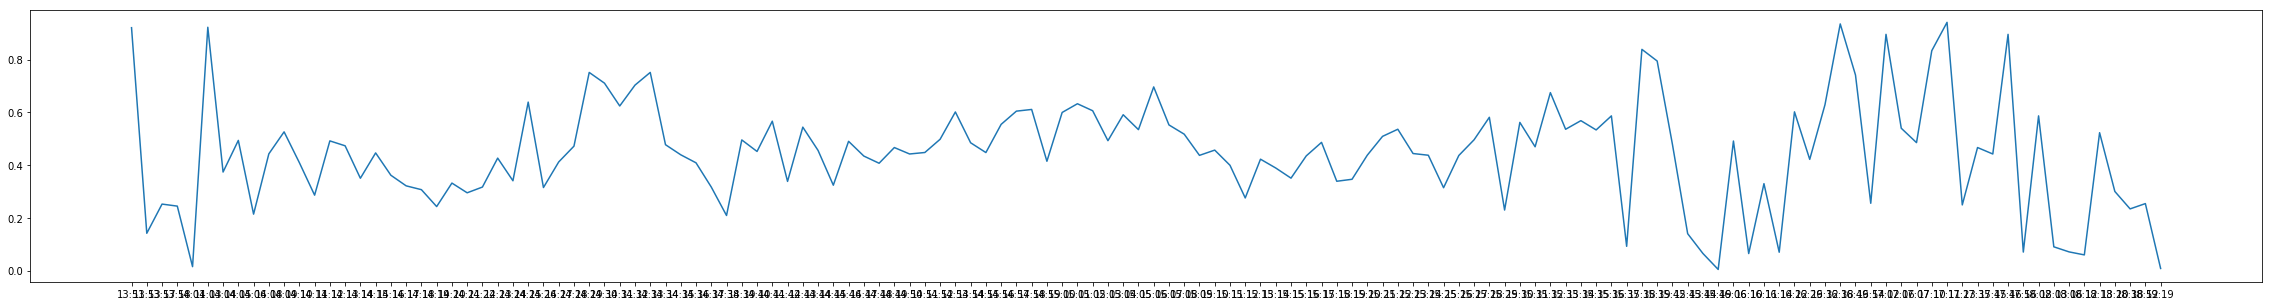

In [17]:
plt.gcf().set_size_inches(40,5)
plt.plot(temp)

## Part2 IP地區

In [17]:
import json
import requests

In [18]:
def ip_analysis(df):
    country, city = [], []
    for index in tqdm_notebook(range(len(df))):
        data = json.loads(requests.get('http://extreme-ip-lookup.com/json/'+df['ip'][index].replace(' ','')).text)
        try:
            country.append(data['country'])
        except:
            country.append(None)
        try:
            city.append(data['city'])
        except:
            city.append(None)
    df['country'] = pd.DataFrame(country)
    df['city'] = pd.DataFrame(city)
    return df

In [21]:
df_1218 = ip_analysis(df_1218)

In [19]:
df_1225 = ip_analysis(df_1225)

In [24]:
df_1227 = ip_analysis(df_1227)

In [26]:
df_1218.to_pickle('ptt_1218_new.pkl')
df_1225.to_pickle('ptt_1225_new.pkl')
df_1227.to_pickle('ptt_1227_new.pkl')

## Part3 切出候選人

In [ ]:
a = []
for i in range(len(df_1218)):
    if ('19:03' <= df_1218['time'][i] and df_1218['time'][i] < '19:12') | ('19:32' <= df_1218['time'][i] and  df_1218['time'][i] < '19:42') | ('20:02' <= df_1218['time'][i] and df_1218['time'][i] < '20:12'):
        a.append('韓國瑜')
    elif ('19:22' <= df_1218['time'][i] and df_1218['time'][i] < '19:32') | ('19:52' <= df_1218['time'][i] and df_1218['time'][i] < '20:02') | ('20:22' <= df_1218['time'][i] and df_1218['time'][i] < '20:32'):
        a.append('蔡英文')
    elif ('19:12' <= df_1218['time'][i] and df_1218['time'][i] < '19:22') | ('19:42' <= df_1218['time'][i] and df_1218['time'][i] < '19:52') | ('20:12' <= df_1218['time'][i] and df_1218['time'][i] < '20:22'):
        a.append('宋楚瑜')
    else:
        a.append(None)
df_1218['candidate'] = a

In [ ]:
a = []
for i in range(len(df_1225)):
    if ('14:15' <= df_1225['time'][i] and df_1225['time'][i] < '14:25') | ('14:45' <= df_1225['time'][i] and  df_1225['time'][i] < '14:55') | ('15:15' <= df_1225['time'][i] and df_1225['time'][i] < '15:25'):
        a.append('韓國瑜')
    elif ('14:05' <= df_1225['time'][i] and df_1225['time'][i] < '14:15') | ('14:35' <= df_1225['time'][i] and df_1225['time'][i] < '14:45') | ('15:05' <= df_1225['time'][i] and df_1225['time'][i] < '15:15'):
        a.append('蔡英文')
    elif ('14:25' <= df_1225['time'][i] and df_1225['time'][i] < '14:35') | ('14:55' <= df_1225['time'][i] and df_1225['time'][i] < '15:05') | ('15:25' <= df_1225['time'][i] and df_1225['time'][i] < '15:35'):
        a.append('宋楚瑜')
    else:
        a.append(None)
df_1225['candidate'] = a

In [ ]:
a = []
for i in range(len(df_1227)):
    if ('19:13' <= df_1227['time'][i] and df_1227['time'][i] < '19:23') | ('19:43' <= df_1227['time'][i] and  df_1227['time'][i] < '19:53') | ('20:13' <= df_1227['time'][i] and df_1227['time'][i] < '20:23'):
        a.append('韓國瑜')
    elif ('19:23' <= df_1227['time'][i] and df_1227['time'][i] < '19:33') | ('19:53' <= df_1227['time'][i] and df_1227['time'][i] < '20:03') | ('20:23' <= df_1227['time'][i] and df_1227['time'][i] < '20:33'):
        a.append('蔡英文')
    elif ('19:03' <= df_1227['time'][i] and df_1227['time'][i] < '19:13') | ('19:33' <= df_1227['time'][i] and df_1227['time'][i] < '19:43') | ('20:03' <= df_1227['time'][i] and df_1227['time'][i] < '20:13'):
        a.append('宋楚瑜')
    else:
        a.append(None)
df_1227['candidate'] = a